# Plot results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os


In [2]:
df_alg_1 = pd.read_csv("data/Algorithm1_1468/"+os.listdir("data/Algorithm1_1468")[0], index_col=0, header=1)
df_alg_1["iteration"] = 0
for i, d in enumerate(os.listdir("data/Algorithm1_1468")[1:]):
    app = pd.read_csv("data/Algorithm1_1468/"+d, index_col=0, header=1)
    app["iteration"] = i + 1
    df_alg_1 = pd.concat([df_alg_1, app], axis=0)

In [4]:
df_alg_2 = pd.read_csv("data/Algorithm2_1468/"+os.listdir("data/Algorithm2_1468")[0], index_col=0, header=1)
df_alg_2["iteration"] = 0
for i, d in enumerate(os.listdir("data/Algorithm2_1468")[1:]):
    app = pd.read_csv("data/Algorithm2_1468/"+d, index_col=0, header=1)
    app["iteration"] = i + 1
    df_alg_2 = pd.concat([df_alg_2, app], axis=0)

In [5]:
df_alg_1[["Best", "Mean"]].groupby([df_alg_1.index]).mean()
df_alg_1[["Best", "Mean"]].groupby([df_alg_1.index]).std()

,Best,Mean
0,,
1,3.310469,0.270744
2,5.184591,0.403942
3,4.977653,0.574112
4,5.563073,0.767126
5,5.526088,1.162526
6,5.305870,1.348801
7,8.808010,1.200749
8,8.808010,1.082926
9,8.725579,0.706192


In [6]:
df_alg_1

,Best,Mean,Best X,iteration
0,,,,
1,15.437764,-5.524525,[-1.00757491e-01 -2.67971129e-01 7.30364229e-...,0
2,15.437764,-3.574882,[-1.00757491e-01 -2.67971129e-01 7.30364229e-...,0
3,15.437764,-1.537311,[-1.00757491e-01 -2.67971129e-01 7.30364229e-...,0
4,15.437764,1.700325,[-1.00757491e-01 -2.67971129e-01 7.30364229e-...,0
5,15.468930,5.876512,[ 0.11376487 -0.00317337 -0.00087901 0.104653...,0
...,...,...,...,...
46,54.352651,29.541135,[-0.31348554 0.04019626 0.02303512 -0.199505...,9
47,54.352651,29.750614,[-0.31348554 0.04019626 0.02303512 -0.199505...,9
48,54.352651,31.054877,[-0.31348554 0.04019626 0.02303512 -0.199505...,9


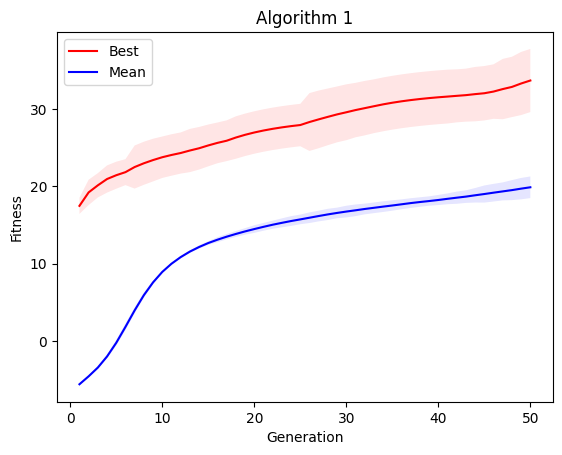

In [9]:
mean = df_alg_1[["Best", "Mean"]].groupby([df_alg_1.index]).mean().ewm(halflife=5).mean()
std_dev = df_alg_1[["Best", "Mean"]].groupby([df_alg_1.index]).std()
# display(std_dev["Best"])


plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['r', 'b'])

plt.plot(mean, label=["Best", "Mean"])
plt.fill_between(mean.index, mean["Best"] - std_dev["Best"]/np.sqrt(10), mean["Best"] + std_dev["Best"]/np.sqrt(10), alpha=0.1)
plt.fill_between(mean.index, mean["Mean"] - std_dev["Mean"]/np.sqrt(10), mean["Mean"] + std_dev["Mean"]/np.sqrt(10), alpha=0.1)
plt.title("Algorithm 1")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.savefig("alg1.png", bbox_inches="tight", dpi=200)

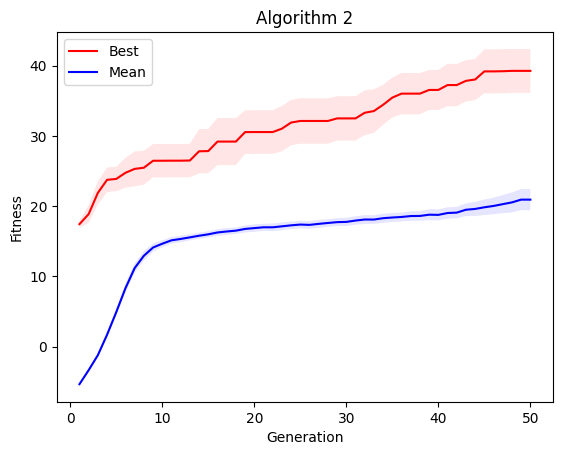

In [11]:
mean = df_alg_2[["Best", "Mean"]].groupby([df_alg_2.index]).mean()
std_dev = df_alg_2[["Best", "Mean"]].groupby([df_alg_2.index]).std()
# display(std_dev["Best"])


plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['r', 'b'])

plt.plot(mean, label=["Best", "Mean"])
plt.fill_between(mean.index, mean["Best"] - std_dev["Best"]/np.sqrt(10), mean["Best"] + std_dev["Best"]/np.sqrt(10), alpha=0.1)
plt.fill_between(mean.index, mean["Mean"] - std_dev["Mean"]/np.sqrt(10), mean["Mean"] + std_dev["Mean"]/np.sqrt(10), alpha=0.1)
plt.title("Algorithm 2")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.savefig("alg2.png", bbox_inches="tight", dpi=200)

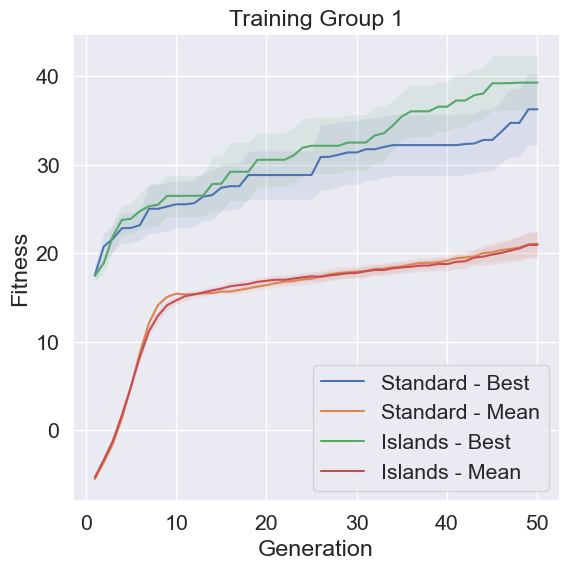

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme() #optional: set seaborn theme
import numpy as np
import pandas as pd
sns.set(font_scale=1.5)

def plot_algorithm(df, algorithm_name, linestyle):
    mean = df[["Best", "Mean"]].groupby([df.index]).mean()
    std_dev = df[["Best", "Mean"]].groupby([df.index]).std()

    plt.plot(mean["Best"], label=f"{algorithm_name} - Best", linestyle=linestyle)
    plt.plot(mean["Mean"], label=f"{algorithm_name} - Mean", linestyle=linestyle)
    plt.fill_between(mean.index, mean["Best"] - std_dev["Best"]/np.sqrt(10), mean["Best"] + std_dev["Best"]/np.sqrt(10), alpha=0.1)
    plt.fill_between(mean.index, mean["Mean"] - std_dev["Mean"]/np.sqrt(10), mean["Mean"] + std_dev["Mean"]/np.sqrt(10), alpha=0.1)


# Assuming df_alg_1 and df_alg_2 are your dataframes
plt.figure(figsize=(6, 6)) # Adjust figure size as needed

plot_algorithm(df_alg_1, "Standard", "-") #solid line
plot_algorithm(df_alg_2, "Islands", "-") #dashed line


plt.title("Training Group 1")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.grid(True) # Add grid for better readability
plt.tight_layout()
plt.savefig("alg_comparison_group1.png", bbox_inches="tight", dpi=200)
plt.show()

In [9]:
data = [
    [14.271598703078588, 20.715403789338524, 15.747149445732973, 15.037978769753302, 4.368680685882744],
    [14.271598703078588, 20.715403789338524, 15.747149445732973, 15.037978769753302, 4.368680685882744],
    [14.271598703078588, 20.715403789338524, 15.747149445732973, 15.037978769753302, 4.368680685882744],
    [14.271598703078588, 20.715403789338524, 15.747149445732973, 15.037978769753302, 4.368680685882744],
    [14.271598703078588, 20.715403789338524, 15.747149445732973, 15.037978769753302, 13.801356497022148],
    [14.271598703078588, 20.715403789338524, 15.747149445732973, 15.037978769753302, 13.801356497022148],
    [14.271598703078588, 20.715403789338524, 15.747149445732973, 15.037978769753302, 13.801356497022148],
    [20.715403789338524, 19.41968379049279, 15.037978769753302, 13.801356497022148, 14.271598703078588],
    [20.715403789338524, 19.41968379049279, 15.037978769753302, 13.801356497022148, 14.271598703078588],
    [20.715403789338524, 19.41968379049279, 15.037978769753302, 13.801356497022148, 14.271598703078588],
    [20.715403789338524, 19.41968379049279, 15.037978769753302, 13.801356497022148, 14.271598703078588],
    [19.41968379049279, 15.747149445732973, 13.801356497022148, 14.271598703078588, 20.715403789338524],
    [19.41968379049279, 15.747149445732973, 13.801356497022148, 14.271598703078588, 20.715403789338524],
    [24.414841859413748, 15.747149445732973, 13.801356497022148, 14.271598703078588, 20.715403789338524],
    [24.414841859413748, 15.747149445732973, 13.801356497022148, 14.271598703078588, 20.715403789338524],
    [24.414841859413748, 15.747149445732973, 13.801356497022148, 14.271598703078588, 20.715403789338524],
    [24.414841859413748, 25.404935943602464, 13.801356497022148, 14.271598703078588, 20.715403789338524],
    [25.404935943602464, 15.747149445732973, 19.45409987618275, 20.715403789338524, 24.414841859413748],
    [25.404935943602464, 15.747149445732973, 19.45409987618275, 20.715403789338524, 24.414841859413748],
    [19.41968379049279, 19.45409987618275, 20.715403789338524, 24.414841859413748, 25.404935943602464],

]

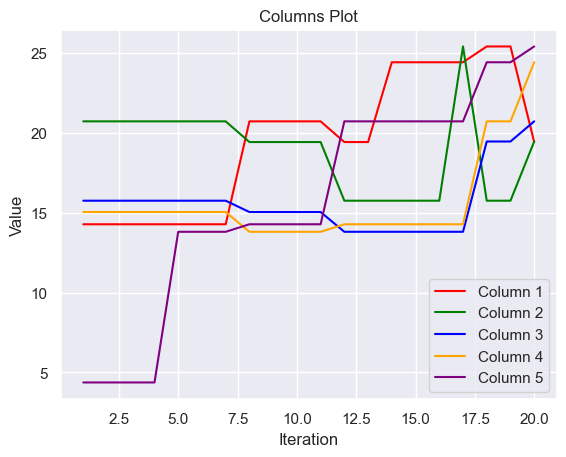

In [10]:
import matplotlib.pyplot as plt
import numpy as np

data = [
    [14.271598703078588, 20.715403789338524, 15.747149445732973, 15.037978769753302, 4.368680685882744],
    [14.271598703078588, 20.715403789338524, 15.747149445732973, 15.037978769753302, 4.368680685882744],
    [14.271598703078588, 20.715403789338524, 15.747149445732973, 15.037978769753302, 4.368680685882744],
    [14.271598703078588, 20.715403789338524, 15.747149445732973, 15.037978769753302, 4.368680685882744],
    [14.271598703078588, 20.715403789338524, 15.747149445732973, 15.037978769753302, 13.801356497022148],
    [14.271598703078588, 20.715403789338524, 15.747149445732973, 15.037978769753302, 13.801356497022148],
    [14.271598703078588, 20.715403789338524, 15.747149445732973, 15.037978769753302, 13.801356497022148],
    [20.715403789338524, 19.41968379049279, 15.037978769753302, 13.801356497022148, 14.271598703078588],
    [20.715403789338524, 19.41968379049279, 15.037978769753302, 13.801356497022148, 14.271598703078588],
    [20.715403789338524, 19.41968379049279, 15.037978769753302, 13.801356497022148, 14.271598703078588],
    [20.715403789338524, 19.41968379049279, 15.037978769753302, 13.801356497022148, 14.271598703078588],
    [19.41968379049279, 15.747149445732973, 13.801356497022148, 14.271598703078588, 20.715403789338524],
    [19.41968379049279, 15.747149445732973, 13.801356497022148, 14.271598703078588, 20.715403789338524],
    [24.414841859413748, 15.747149445732973, 13.801356497022148, 14.271598703078588, 20.715403789338524],
    [24.414841859413748, 15.747149445732973, 13.801356497022148, 14.271598703078588, 20.715403789338524],
    [24.414841859413748, 15.747149445732973, 13.801356497022148, 14.271598703078588, 20.715403789338524],
    [24.414841859413748, 25.404935943602464, 13.801356497022148, 14.271598703078588, 20.715403789338524],
    [25.404935943602464, 15.747149445732973, 19.45409987618275, 20.715403789338524, 24.414841859413748],
    [25.404935943602464, 15.747149445732973, 19.45409987618275, 20.715403789338524, 24.414841859413748],
    [19.41968379049279, 19.45409987618275, 20.715403789338524, 24.414841859413748, 25.404935943602464],

]

data_array = np.array(data) #Convert to numpy array for easier column access

x = range(1, len(data_array) + 1) #x-axis (iteration number)
colors = ['red', 'green', 'blue', 'orange', 'purple']

for i in range(data_array.shape[1]): #Iterate through columns
	plt.plot(x, data_array[:, i], label=f'Column {i+1}', color=colors[i])


plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Columns Plot')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
data_strings = [
    "1: 14.271598703078588, 2: 20.715403789338524, 3: 15.747149445732973, 4: 15.037978769753302, 5: 4.368680685882744",
    "1: 14.271598703078588, 2: 20.715403789338524, 3: 15.747149445732973, 4: 15.037978769753302, 5: 4.368680685882744",
    "1: 14.271598703078588, 2: 20.715403789338524, 3: 15.747149445732973, 4: 15.037978769753302, 5: 4.368680685882744",
    "1: 14.271598703078588, 2: 20.715403789338524, 3: 15.747149445732973, 4: 15.037978769753302, 5: 4.368680685882744",
    "1: 14.271598703078588, 2: 20.715403789338524, 3: 15.747149445732973, 4: 15.037978769753302, 5: 4.368680685882744",
    "1: 14.271598703078588, 2: 20.715403789338524, 3: 15.747149445732973, 4: 15.037978769753302, 5: 4.368680685882744",
    "1: 14.271598703078588, 2: 20.715403789338524, 3: 15.747149445732973, 4: 15.037978769753302, 5: 4.368680685882744",
    "1: 14.271598703078588, 2: 20.715403789338524, 3: 15.747149445732973, 4: 15.037978769753302, 5: 4.368680685882744",
    "1: 14.271598703078588, 2: 20.715403789338524, 3: 15.747149445732973, 4: 15.037978769753302, 5: 13.801356497022148",
    "1: 14.271598703078588, 2: 20.715403789338524, 3: 15.747149445732973, 4: 15.037978769753302, 5: 13.801356497022148",
    "1: 14.271598703078588, 2: 20.715403789338524, 3: 15.747149445732973, 4: 15.037978769753302, 5: 13.801356497022148",
    "1: 20.715403789338524, 2: 19.41968379049279, 3: 15.037978769753302, 4: 13.801356497022148, 5: 14.271598703078588",
    "1: 20.715403789338524, 2: 19.41968379049279, 3: 15.037978769753302, 4: 13.801356497022148, 5: 14.271598703078588",
    "1: 20.715403789338524, 2: 19.41968379049279, 3: 15.037978769753302, 4: 13.801356497022148, 5: 14.271598703078588",
    "1: 20.715403789338524, 2: 19.41968379049279, 3: 15.037978769753302, 4: 13.801356497022148, 5: 14.271598703078588",
    "1: 20.715403789338524, 2: 19.41968379049279, 3: 15.037978769753302, 4: 13.801356497022148, 5: 14.271598703078588",
    "1: 20.715403789338524, 2: 19.41968379049279, 3: 15.037978769753302, 4: 13.801356497022148, 5: 14.271598703078588",
    "1: 20.715403789338524, 2: 19.41968379049279, 3: 15.037978769753302, 4: 13.801356497022148, 5: 14.271598703078588",
    "1: 20.715403789338524, 2: 19.41968379049279, 3: 15.037978769753302, 4: 13.801356497022148, 5: 14.271598703078588",
    "1: 20.715403789338524, 2: 19.41968379049279, 3: 15.037978769753302, 4: 13.801356497022148, 5: 14.271598703078588",
    "1: 19.41968379049279, 2: 15.747149445732973, 3: 13.801356497022148, 4: 14.271598703078588, 5: 20.715403789338524",
    "1: 19.41968379049279, 2: 15.747149445732973, 3: 13.801356497022148, 4: 14.271598703078588, 5: 20.715403789338524",
    "1: 24.414841859413748, 2: 15.747149445732973, 3: 13.801356497022148, 4: 14.271598703078588, 5: 20.715403789338524",
    "1: 24.414841859413748, 2: 15.747149445732973, 3: 13.801356497022148, 4: 14.271598703078588, 5: 20.715403789338524",
    "1: 24.414841859413748, 2: 15.747149445732973, 3: 13.801356497022148, 4: 14.271598703078588, 5: 20.715403789338524",
    "1: 24.414841859413748, 2: 15.747149445732973, 3: 13.801356497022148, 4: 14.271598703078588, 5: 20.715403789338524",
    "1: 24.414841859413748, 2: 15.747149445732973, 3: 13.801356497022148, 4: 14.271598703078588, 5: 20.715403789338524",
    "1: 24.414841859413748, 2: 15.747149445732973, 3: 13.801356497022148, 4: 14.271598703078588, 5: 20.715403789338524",
    "1: 24.414841859413748, 2: 15.747149445732973, 3: 13.801356497022148, 4: 14.271598703078588, 5: 20.715403789338524",
    "1: 24.414841859413748, 2: 25.404935943602464, 3: 13.801356497022148, 4: 14.271598703078588, 5: 20.715403789338524",
    "1: 25.404935943602464, 2: 15.747149445732973, 3: 19.45409987618275, 4: 20.715403789338524, 5: 24.414841859413748",
    "1: 25.404935943602464, 2: 15.747149445732973, 3: 19.45409987618275, 4: 20.715403789338524, 5: 24.414841859413748",
    "1: 25.404935943602464, 2: 15.747149445732973, 3: 19.45409987618275, 4: 20.715403789338524, 5: 24.414841859413748",
    "1: 25.404935943602464, 2: 15.747149445732973, 3: 19.45409987618275, 4: 20.715403789338524, 5: 24.414841859413748",
    "1: 25.404935943602464, 2: 15.747149445732973, 3: 19.45409987618275, 4: 20.715403789338524, 5: 24.414841859413748",
    "1: 25.404935943602464, 2: 15.747149445732973, 3: 19.45409987618275, 4: 20.715403789338524, 5: 24.414841859413748",
    "1: 25.404935943602464, 2: 15.747149445732973, 3: 19.45409987618275, 4: 20.715403789338524, 5: 24.414841859413748",
    "1: 25.404935943602464, 2: 15.747149445732973, 3: 19.45409987618275, 4: 20.715403789338524, 5: 24.414841859413748",
    "1: 25.404935943602464, 2: 15.747149445732973, 3: 19.45409987618275, 4: 20.715403789338524, 5: 24.414841859413748",
    "1: 25.404935943602464, 2: 15.747149445732973, 3: 19.45409987618275, 4: 20.715403789338524, 5: 24.414841859413748",
    "1: 19.41968379049279, 2: 19.45409987618275, 3: 20.715403789338524, 4: 24.414841859413748, 5: 25.404935943602464",
    "1: 19.41968379049279, 2: 19.45409987618275, 3: 20.715403789338524, 4: 24.414841859413748, 5: 25.404935943602464",
    "1: 19.41968379049279, 2: 19.45409987618275, 3: 20.715403789338524, 4: 24.414841859413748, 5: 25.404935943602464",
    "1: 19.41968379049279, 2: 19.45409987618275, 3: 20.715403789338524, 4: 24.414841859413748, 5: 25.404935943602464",
    "1: 19.41968379049279, 2: 19.45409987618275, 3: 20.715403789338524, 4: 24.414841859413748, 5: 25.404935943602464",
    "1: 19.41968379049279, 2: 19.45409987618275, 3: 20.715403789338524, 4: 24.414841859413748, 5: 25.404935943602464",
    "1: 19.41968379049279, 2: 19.45409987618275, 3: 20.715403789338524, 4: 24.414841859413748, 5: 25.404935943602464",
    "1: 19.41968379049279, 2: 19.45409987618275, 3: 20.715403789338524, 4: 24.414841859413748, 5: 25.404935943602464",
    "1: 19.41968379049279, 2: 19.45409987618275, 3: 20.715403789338524, 4: 24.414841859413748, 5: 25.404935943602464"
]

arrays = [[] for _ in range(5)]

for data_string in data_strings:
    items = data_string.split(', ')
    for item in items:
        key, value = item.split(': ')
        arrays[int(key) - 1].append(float(value))

for i, arr in enumerate(arrays):
    print(f"Array {i+1}:", arr)

Array 1: [14.271598703078588, 14.271598703078588, 14.271598703078588, 14.271598703078588, 14.271598703078588, 14.271598703078588, 14.271598703078588, 14.271598703078588, 14.271598703078588, 14.271598703078588, 14.271598703078588, 20.715403789338524, 20.715403789338524, 20.715403789338524, 20.715403789338524, 20.715403789338524, 20.715403789338524, 20.715403789338524, 20.715403789338524, 20.715403789338524, 19.41968379049279, 19.41968379049279, 24.414841859413748, 24.414841859413748, 24.414841859413748, 24.414841859413748, 24.414841859413748, 24.414841859413748, 24.414841859413748, 24.414841859413748, 25.404935943602464, 25.404935943602464, 25.404935943602464, 25.404935943602464, 25.404935943602464, 25.404935943602464, 25.404935943602464, 25.404935943602464, 25.404935943602464, 25.404935943602464, 19.41968379049279, 19.41968379049279, 19.41968379049279, 19.41968379049279, 19.41968379049279, 19.41968379049279, 19.41968379049279, 19.41968379049279, 19.41968379049279]
Array 2: [20.71540378

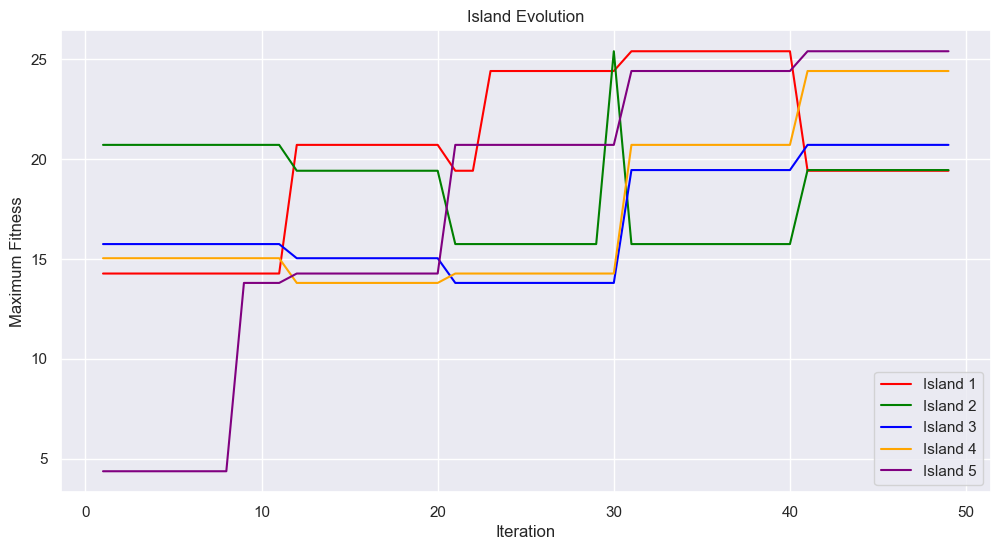

In [12]:
x = range(1, len(arrays[0]) + 1)  # x-axis (iteration number)
colors = ['red', 'green', 'blue', 'orange', 'purple']

for i in range(len(arrays)):  # Iterate through arrays
	plt.plot(x, arrays[i], label=f'Island {i+1}', color=colors[i])
plt.gcf().set_size_inches(12, 6)

plt.xlabel('Iteration')
plt.ylabel('Maximum Fitness')
plt.title('Island Evolution')
plt.legend()
plt.savefig("islands.png", dpi=200)

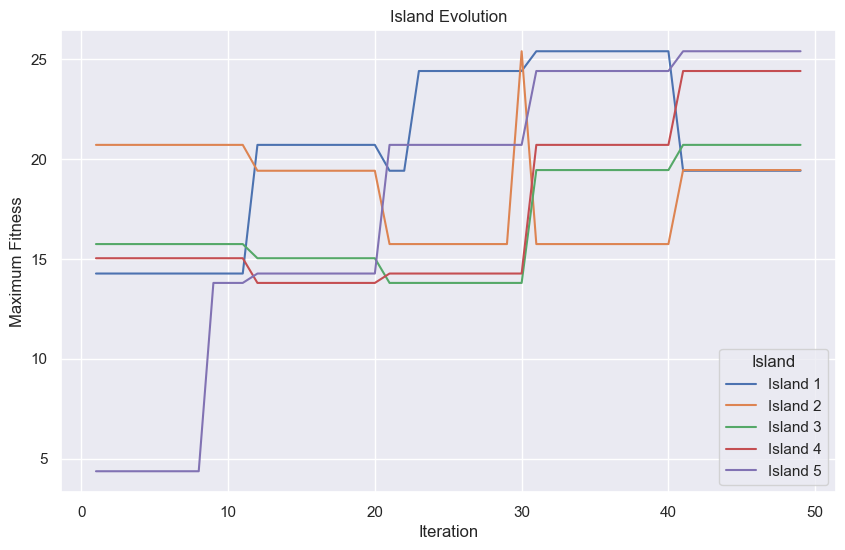

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



# Prepare data for Seaborn (needs a long-format DataFrame)
data = {'Iteration': [], 'Island': [], 'Maximum Fitness': []}
for i, arr in enumerate(arrays):
    data['Iteration'].extend(range(1, len(arr) + 1))
    data['Island'].extend([f'Island {i+1}'] * len(arr))
    data['Maximum Fitness'].extend(arr)

df = pd.DataFrame(data)

# Create the plot
sns.set_theme() #optional: set seaborn theme
plt.figure(figsize=(10,6)) # Adjust figure size if needed
sns.lineplot(x='Iteration', y='Maximum Fitness', hue='Island', data=df)


plt.title('Island Evolution')
plt.savefig("islands_seaborn.png", bbox_inches="tight", dpi=200)
plt.show()